![BEDU logo](https://drive.google.com/uc?id=1GERI1OgKL5MPNdf89PWnYiU1PQ20LJld)

<center> Módulo 4   


# <center> Proyecto Machine Learning
# <center> Detección de Fraudes en Tarjetas de Crédito


__Equipo 24__

Integrantes:
* Diego
* Carlos
* Jorge
* Pedro
* Alexis
* Taryn

## Objetivo



### Descripción del Problema

Es importante que las compañías bancarias y crediticias sean capaces de reconocer transacciones fraudulentas en trajetas de crédito para que los tarjetahabientes no reciban cargos deconocidos.  



### Descripción del conjunto de datos


El conjunto de datos contiene transacciones realizadas con tarjetas de crédito en septiembre de 2013 por titulares de tarjetas europeos.
Este conjunto de datos presenta transacciones que ocurrieron en dos días, donde tenemos 492 fraudes de 284,807 transacciones. __El conjunto de datos está fuertemente desequilibrado: la clase positiva (fraudes) representa el 0.172% de todas las transacciones__.

El dataset contiene variables numéricas que son el resultado de una transformación PCA. Lamentablemente, debido a cuestiones de confidencialidad, no podemos proporcionar las características originales ni más información general sobre los datos. Las características V1, V2,… V28 son los componentes principales obtenidos con PCA. Las únicas características que no se han transformado con PCA son 'Time' y 'Amount'.   
La característica 'Tiempo' contiene los segundos transcurridos entre cada transacción y la primera transacción en el conjunto de datos.   
La característica 'Monto' es el monto de la transacción, esta característica se puede utilizar para dependant cost-sensitive learning.  
La característica 'Clase' es la variable de respuesta y toma el valor 1 en caso de fraude y 0 en caso contrario.

Dado el __índice de desequilibrio de clases__, recomendamos medir la __precisión utilizando el área bajo la curva de recuperación de precisión (AUPRC)__. La precisión de la matriz de confusión no es significativa para una clasificación desequilibrada.

https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

## Problema a Resolver y Métodos


__Problema__: Utilizar varios modelos predictivos para ver qué tan precisos son para detectar si una transacción es un pago normal o un fraude.

__Modelos__

- __Árbol de decisión__: Es un tipo de algoritmo de machine learning algorithm que usa un modelo similar a un árbol para hacer prediciones basadas en las relaciones entre las características del dataset. Trabaja dividiendo los datos en conjuntos más perqueños basados en los valores de las características hasta que alcance una decisión acerca de la variable objetivo para cada grupo.

- __Logistic Regression__: Es un tipo de algoritmo de  type of machine learning que es unsado para la clasificación de tareas y modela la probabilidad de que una muestra pertenezca a cierta clase usando una fonción lo´gistica.

Modelo Supervisado de Clasificación:
- Probaremos modelos sobre la variable objetivo Class.
- El problema principal del dataset es que está desbalanceado, por lo que se usarán técnicas de balanceo de datos (undersampling, oversampling).

### Importando los módulos

In [1]:
# Para exploración y análisis de datos

import pandas as pd  # Para procesamiento de datos, csv, dataframes.
import numpy as np  # Para funciones de álgebra lineal y otras funciones matemáticas
import seaborn as sns  # Para gráficos
import matplotlib.pyplot as plt # Para gráficos
import warnings
warnings.filterwarnings('ignore')
#%matplotlib inline

### Leyendo Los datos



#### APPI Kaggle

Usando la metodología de las siguientes páginas para no descargar el archivo localmente, sino extraerlo de la API de Kaggle:
* [ Platzi](https://platzi.com/tutoriales/1794-pandas/6926-usando-la-api-de-kaggle-con-google-colab-para-carga-y-descarga-de-datasets/?&gad_source=1&gclid=Cj0KCQiApOyqBhDlARIsAGfnyMr0UeMtsnpiqBIjzxbIBeJ6-zhVZLMzf6CMzPXU1igSDv7E23wc-hYaAoDpEALw_wcB&gclsrc=aw.ds
)
* [Analyticsvidhya](https://www.analyticsvidhya.com/blog/2021/06/how-to-load-kaggle-datasets-directly-into-google-colab/)

In [2]:
# Instalar la librería de Kaggle
! pip install -q kaggle

In [3]:
# Importar el módulo del sistema de archivos de Google Colab
from google.colab import files

ModuleNotFoundError: No module named 'google'

Descargar la API key de la página de Kaggle: Settings-> Account-> API -> Create New API Token -> Guardar el archivo kaggle.json

In [4]:
# Usar el comando de files.upload() para cargar el archivo en el sistema local.
files.upload()

NameError: name 'files' is not defined

In [5]:
# Crear un directorio llamado kaggle
! mkdir ~/.kaggle

# Copiar el archivo 'kaggle.json' que se
! cp kaggle.json ~/.kaggle/

# !cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json

# Con el código 600 se otorga los permisos de lectura para las credenciales.
!chmod 600 ~/.kaggle/kaggle.json

# Probar la conexión a la API de Kaggle. Va a salir una lista de los datasets que tenemos disponibles para consulta.
! kaggle datasets list

# Descargar el dataset de creditcardfraud. https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud
! kaggle datasets download -d mlg-ulb/creditcardfraud

# Descomprimir el archivo que se descarga.
!unzip creditcardfraud.zip


ref                                                                  title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
-------------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
thedrcat/daigt-v2-train-dataset                                      DAIGT V2 Train Dataset                              29MB  2023-11-16 01:38:36           1487        153  1.0              
muhammadbinimran/housing-price-prediction-data                       Housing Price Prediction Data                      763KB  2023-11-21 17:56:32           6645        119  1.0              
thedevastator/netflix-imdb-scores                                    Netflix IMDB Scores                                699KB  2023-12-03 14:10:34           2041         35  1.0              
henryshan/starbucks                     

In [ ]:
# Leer el archivo csv cen un dataframe con pandas.
df = pd.read_csv('/content/creditcard.csv')
df.head()

#### CSV local

In [2]:
# Leer el archivo csv cen un dataframe con pandas.
df = pd.read_csv("E:\BEDU\Curso 4\Proyecto\Datos\creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## 1. Pandas y Análisis Exploratorio de Datos
- Crear Series y DataFrames y aprovecharlas a la perfección
- Usa conceptos estadísticos para realizar un análisis exploratorio datasets para entender sus datos antes de realizar cualquier manipulación



##### **Análisis descriptivo**

In [ ]:
# Revisando los datos.
df.head()

- __Time__: segundos entre transacciones. Dos días del mes de Septiembre de 2013.
- __Amount__: Monto de la transacción en Euros.
- __Class__: 0 No- Fraudulenta, 1 Fraudulenta.
- __V1 to V28__: Son el resultado de una transformación PCA debido a privacidad de la información.



In [ ]:
# Información Estadística: Count, mean, std, min, 25%, 50%, 75%, max.
df.describe()

In [ ]:
# Información del dataframe: rango de datos, número de columnas, nombre de las columnas, valores nulos, tipos de datos
df.info()

- Las columnas __V1 a V28__ ya han sido escaladas, las únicas columnas que no han sido escaladas son __'Time', 'Amount', 'Class'__.   
- El número de transacciones es relativamente pequeño.   
- Podemos observar que en la columna de __Amount__, o el monto de las transacciones, la media es de __88 euros__, pero tenemos valores que llegan a más __25,000 euros__.
- En la columna __Tiempo__, también existe una gran varianza de los datos.


#### L**impiando el Dataset**



In [ ]:
# Analizar si existen valores nulos en el df y determinar si es necesario un reemplazo.
df.isnull().sum()

**No existen valores nulos, por lo que no es necesario reemplazar valores.**

In [40]:
# Duplicados

# Duplicados en la clase de transacciones fraudulentas
transacciones_con_fraude = df['Class'] == 1

df_fraude = df[transacciones_con_fraude]
df_fraude.shape

duplicados_fraude = df_fraude.duplicated().sum()

# Duplicados en la clase de transacciones no fraudulentas
transacciones_sin_fraude = df['Class'] == 0

df_sin_fraude = df[transacciones_sin_fraude]
df_sin_fraude.shape

duplicados_sin_fraude = df_sin_fraude.duplicated().sum()

print(f'Duplicados de transacciones con fraude: {duplicados_fraude}')
print(f'Duplicados de transacciones con fraude: {duplicados_sin_fraude}')
print(f'Total de duplicados: {duplicados_fraude + duplicados_sin_fraude}')

Duplicados de transacciones con fraude: 19
Duplicados de transacciones con fraude: 1062
Total de duplicados: 1081


In [47]:
# Duplicados Totales

df_duplicados = df.duplicated().sum()

# Eliminar duplicados

df_sin_duplicados = df.drop_duplicates()

print(f'Total de datos originales: {df.shape[0]}, Total de datos duplicados: {df_duplicados}')
print(f'Datos sin duplicados: {df.shape[0] - df_duplicados}')

df_sin_duplicados

Total de datos originales: 284807, Total de datos duplicados: 1081
Datos sin duplicados: 283726


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


#### **Análisis Exploratorio**

##### **Analizando la columna 'Class'**

In [ ]:
# Determinar el número de transacciones Fraudulentas o No Fraudulentas

transacciones_con_fraude = (df['Class'] == 1).sum()
transacciones_sin_fraude = (df['Class'] == 0).sum()

print(f'Transacciones con Fraude: {transacciones_con_fraude} \nTransacciones sin fraude: {transacciones_sin_fraude}')

In [ ]:
# Gráfico de Barras para el conteo de transacciones

sns.countplot(df, x = "Class")
plt.title('Class: \n (0: No Fraud || 1: Fraud)');

In [ ]:
# Determinar el porcentaje de transacciones fraudulentas vs porcentaje de transacciones no fraudulentas.

porcentaje_con_fraude = (df['Class'] == 1).sum() / len(df['Class'])
porcentaje_sin_fraude = (df['Class'] == 0).sum() / len(df['Class'])

print(f'Porcentaje de Transacciones con Fraude: {porcentaje_con_fraude:.2%} \nPorcentaje de Transacciones sin fraude: {porcentaje_sin_fraude:.2%}')

In [ ]:

# df_fraude = df['Class'].value_counts()
df_fraude = df[["Class", "Time"]].groupby("Class")[["Time"]].count().reset_index()

df_fraude

In [ ]:
# Gráfico de pie de porcentajes
porcentajes = df_fraude["Time"] / df_fraude["Time"].sum() * 100

nombres = ['No Fraudulentas', 'Fraudulentas']

desfase =(0,0.2)
plt.pie(porcentajes, labels=nombres, autopct='%1.1f%%', startangle=45, explode=desfase)
plt.axis('equal') # Se usa para que se vea como un círculo
plt.title('Porcentaje de transacciones fraudulentas y no fraudulentas');

Los datos están altamente **desbalanceados**, el porcentaje de transacciones clasificados sin fraude es de __99.83%__, mientras el porcentaje de transacciones clasificadas sin fraude es de __0.17%__ y,  por lo tanto, debemos hacer alguna transformación o nuestro modelo de aprendizaje solo predecirá casos no fraudulentos. Nuestro objetivo es que el modelo detecte patrones que nos den señales de fraude.

##### **Analizando las columnas V1 - V28**



Las columnas V1-28 ya han sido transformadas por PCA, por lo que ya han sido escaladas.

In [ ]:
df_temp = df.copy()
cols = list(df_temp.columns.values)

no_frauds = df_temp.Class == 0
with_frauds = df_temp.Class == 1



In [ ]:
# Crear las gráficas para ver las distribuciones.

plt.figure(figsize=(20,60))

for n, col in enumerate(cols):
  plt.subplot(11,3,n+1)
  sns.distplot(df_temp[col][no_frauds], color='green')
  sns.distplot(df_temp[col][with_frauds], color='red')
  plt.title(col, fontsize=17)

plt.show()


Comentarios: Se puede observar que las distribuciones de V1-V28 tienen una distribución más parecida a una normal.

##### **Analizando la columna Time y Amount**

In [ ]:
# Gráfico de distribución de la columna Time

sns.distplot(df['Time']).set(title="Distribución de Tiempo de Transacción");

In [ ]:
# Gráfica de distribución de la columna Amount

sns.distplot(df['Amount']).set(title="Distribución de Monto de la Transacción");

Se puede observar que los datos están sesgados y tienen muchos outliers, por eso es necesario escalar la información, lo cual podría hacerse con un escalamiento robusto (robust scaling) o un escalamiento min-max.


> *El escalamiento robusto es menos sensible a los valores atípicos en los datos. Escala las características de entrada en función de su mediana y rango intercuartílico (IQR). El IQR es el rango entre el primer cuartil (percentil 25) y el tercer cuartil (percentil 75) de los datos. El escalamiento robusto es particularmente útil para datos con valores atípicos significativos o distribuciones no gaussianas.*



> *El escalamiento min-max, también conocido como normalización, escala las características de entrada a un rango específico, generalmente entre 0 y 1. Esto se logra restando el valor mínimo de la característica a cada punto de datos y dividiendo el resultado por el rango de la característica. Es especialmente útil para datos con distribuciones sesgadas o cuando los algoritmos requieren que las características de entrada estén dentro de un rango específico.*



Referencias:
- Escalamiento: https://ts2.space/es/escalamiento-de-caracteristicas-en-aprendizaje-automatico/#gsc.tab=0

##### __Matriz de Correlaciones__

In [ ]:
# Matriz de correlaciones
corr = df.corr()


In [ ]:
# Mapa de calor
sns.heatmap(corr, cmap="Blues");


##### **Conclusiones**  
1. Los datos están altamente desbalanceados (oversampling, undersampling), lo cual nos generará problemas con nuestros modelos de machine learning.  
2. La columna Amount tiene valores atípicos (outliers) muy grandes, lo que puede crear un problema en el modelo. Debido a eso es necesario escalar los datos.
3. No se puede observar una correlación entre las variables

### **Escalamiento de las columnas Time y Amount**

Se hará un escalamiento de la columna Amount y Time con la librería StandardScaler



In [3]:
# Importar la librería Preprocessing de sklearn
from sklearn.preprocessing import StandardScaler

In [4]:
# Aplicamos escalamiento a la columna Amount
# fit_transform ajusta los datos después los transforma, se le pasa la columna Amount convertida a un numpy de dos dimensiones.
# Reshape (-1,1) significa: -1 cualquier cantidad de filas, 1 una columna

df['Amount'] = StandardScaler().fit_transform(df['Amount'].to_numpy().reshape(-1,1))

# df['Amount'].hist();

In [5]:
df['Amount'].describe()

count    2.848070e+05
mean     2.913952e-17
std      1.000002e+00
min     -3.532294e-01
25%     -3.308401e-01
50%     -2.652715e-01
75%     -4.471707e-02
max      1.023622e+02
Name: Amount, dtype: float64

In [5]:
# Aplicamos escalamiento a la columna Amount
# fit_transform ajusta los datos después los transforma, se le pasa la columna Amount convertida a un numpy de dos dimensiones.
# Reshape (-1,1) significa: -1 cualquier cantidad de filas, 1 una columna

df['Time'] = StandardScaler().fit_transform(df['Time'].to_numpy().reshape(-1,1))

# df['Time'].hist();

In [52]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000
mean,-3.065637e-16,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,2.913952e-17,0.001727
std,1.000002e+00,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,1.000002e+00,0.041527
min,-1.996583e+00,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,-3.532294e-01,0.000000
25%,-8.552120e-01,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,-3.308401e-01,0.000000
50%,-2.131453e-01,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,-2.652715e-01,0.000000
75%,9.372174e-01,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,-4.471707e-02,0.000000
max,1.642058e+00,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,1.023622e+02,1.000000


### Escogiendo Variables  - Carlos

**Significancia de las variables**

### Seleccionando Muestras Balanceadas

Necesitamos una submuestra del dataframe que contenga un monto igual de casos fraudulentos como no fraudulentos.

El objetivo es permitir que nuestro modelo de aprendizaje pueda entender mejor los patrones que determinan si una transacción es fraudulenta o no.

Debido al desbalance de los datos originales, no se puede observar las correlaciones verdaderas entre la variable objetivo y las demás características.




Referencias:
- https://www.kaggle.com/code/janiobachmann/credit-fraud-dealing-with-imbalanced-datasets

In [ ]:
'''
#Dado que la mayoría de nuestros datos ya han sido escalados,
#debemos escalar las columnas que quedan por escalar (Cantidad y Tiempo)
from sklearn.preprocessing import StandardScaler, RobustScaler

# RobustScaler es menos propenso a valores atípicos.

std_scaler = StandardScaler()
rob_scaler = RobustScaler()

df['scaled_monto'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_tiempo'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True)

scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']

df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
df.insert(0, 'scaled_amount', scaled_amount)
df.insert(1, 'scaled_time', scaled_time)

# Monto y Tiempo estan escaladas

df.head()

'''

In [ ]:
'''

#Lo que entendí de esta celda es que hace la comparación de resultados de pruebas del dataset original con el dataset escalado
#En realidad veo inecesaria esta prueba por lo que creo que es mejor no hacerla

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit, StratifiedKFold

print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

X = df.drop('Class', axis=1)
y = df['Class']

sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

for train_index, test_index in sss.split(X, y):
    print("Train:", train_index, "Test:", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]

original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values


train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)
print('-' * 100)

print('Label Distributions: \n')
print(train_counts_label/ len(original_ytrain))
print(test_counts_label/ len(original_ytest))
'''

In [ ]:
#Vamos a mezclar los datos antes de crear las submuestras.
df = df.sample(frac=1)

# Obtenemos 492 fraudes y 492 no fraudes
fraude_df = df.loc[df['Class'] == 1]
no_fraude_df = df.loc[df['Class'] == 0][:492]

#Juntamos los dos dataframes
distribucion_df = pd.concat([fraude_df, no_fraude_df])

# Revolvemos las filas del dataframe
df_ff = distribucion_df.sample(frac=1, random_state=42)

df_ff.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
244619,1.21,0.10,1.02,-0.32,-0.63,0.93,-0.59,0.89,0.01,-0.35,...,-0.28,-0.68,0.09,0.67,-0.46,0.09,0.22,0.08,-0.35,0
42009,-1.13,-2.74,3.66,-4.11,5.34,-2.67,-0.09,-4.39,-0.28,-2.82,...,2.42,-0.10,0.38,-0.15,-0.40,0.28,0.83,0.22,0.10,1
231023,1.09,1.94,-0.40,-1.07,0.29,-0.30,-0.93,0.09,-0.26,1.09,...,-0.13,-0.23,0.17,-0.07,-0.09,-0.09,-0.03,-0.05,-0.12,0
276864,1.53,-1.37,2.79,-4.35,2.40,-1.69,0.11,-0.92,-2.15,-2.03,...,-0.87,0.50,0.14,0.37,0.10,-0.41,0.45,0.10,1.04,1
153885,0.12,-6.99,5.15,-4.60,4.53,0.85,-0.21,-4.43,-5.13,0.07,...,5.45,-2.06,-0.28,0.12,0.57,0.15,0.30,1.78,-0.35,1


In [ ]:
df_ff.shape

(984, 31)

Distribución de las clases en el conjunto de datos de la submuestra
Class
0   0.50
1   0.50
Name: count, dtype: float64


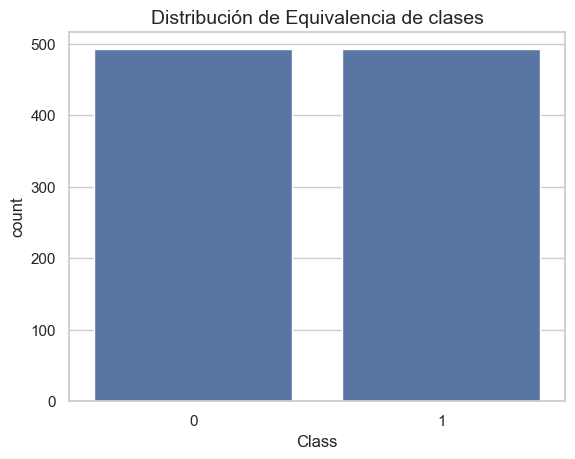

In [ ]:
print('Distribución de las clases en el conjunto de datos de la submuestra')
print(df_ff['Class'].value_counts()/len(df_ff))


sns.countplot(data=df_ff, x='Class')
plt.title('Distribución de Equivalencia de clases', fontsize=14)
plt.show()

## 2. ¿Por qué el problema amerita ser solucionado por Machine Leaning?

Nuestro problema amerita ser resuelto con una técnica de machine learning debido a que nuestro objetivo es entrenar el algoritmo para reconocer patrones de casos fraudulentos a partir de la información que obtenemos de una transacción. Es decir, queremos identificar anomalías en los datos que podrían indicar un problema en una transacción.  [[1]](https://www.elastic.co/es/what-is/machine-learning#:~:text=La%20detecci%C3%B3n%20de%20anomal%C3%ADas%20es,Conoce%20m%C3%A1s%20sobre%20AIOps.)


En particular, creemos que podemos usar un modelo suvervisado de clasificación y también de regresión, debido a las características de nuestro dataset. La variable objetivo 'Class' funciona como una etiqueta donde el valor 1 indica que una transacción es fraudulenta y un 0 indica que no es fraudulenta.

# Modelo de Clasificación

## División de Datasets
Los datasets se encuentran divididos en entrenamiento y prueba, o entrenamiento, validación y prueba, de manera aleatoria, con proporciones adecuadas.  [[2]](https://builtin.com/data-science/train-test-split)

In [6]:
# Importando Módulos
from sklearn.model_selection import train_test_split

# Dividiendo los datos en entrenamiento X, y prueba y.
X = df.drop('Class', axis=1) # Atributos
y = df.Class  # Etiquetas

# Dividiendo los conjuntos de datos en entrenamiento y prueba
# Test size =  25%
# Train size = 75%
# (semilla) random_state = 42

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Imprimir las longitudes de los conjuntos de datos para verificar
print("Tamaño del conjunto de entrenamiento:", len(X_train))
print("Tamaño del conjunto de prueba:", len(X_test))

Tamaño del conjunto de entrenamiento: 213605
Tamaño del conjunto de prueba: 71202


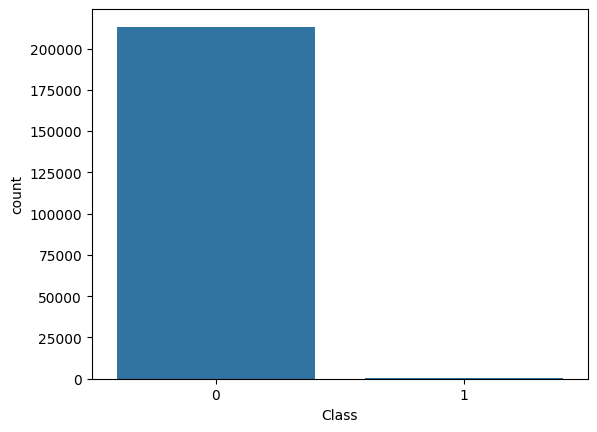

In [54]:
# Distribución del conjunto de datos de entrenamiento y_train
y_muestra_train = pd.DataFrame(y_train)
sns.countplot(y_muestra_train, x ="Class");

## Validación por K-Fold o LOOCV y Métricas de Desempeño

Las pruebas de validación cruzada se aplican adecuadamente en conjunto con los algoritmos, de tal manera que no hay datos favoritos o fácilmente clasificables en el dataset de pruebas


### Validación Cruzada K-Fold

* La validación cruzada (K-fold) es una técnica para evaluar el rendimiento de un modelo de forma robusta.   
* Divide los datos en conjuntos de entrenamiento y prueba múltiples veces.   
* Permite una evaluación más precisa de cómo el modelo generaliza a datos no vistos.   
* Ayuda a evitar el sobreajuste (overfitting) y proporciona una medida más fiable del rendimiento del modelo.
[[Sesion 2]](https://github.com/alemora24/C1-Machine-Learning-MASIVO/blob/main/Sesion-02/Ejemplo02.ipynb
)


In [7]:

def validacion_cruzada(modelo, X, y):
    # Importando bibliotecas
    import numpy as np
    from sklearn.model_selection import KFold, cross_val_score

    # Definir el número de pliegues para la validación cruzada
    num_pliegues = 5

    # Crear un objeto KFold para dividir los datos en pliegues
    kf = KFold(n_splits=num_pliegues, shuffle=True, random_state=42)

    resultados = cross_val_score(modelo, X, y, cv= 5 )

    #Ver el promedio de los resultados
    promedio = resultados.mean()

    #Validacion cruzada
    return print(f'Precisión de validación cruzada: Promedio {promedio:.2f} (+/- {resultados.std() * 2:.2f})')

### Métricas de Desempeño

**Matriz de Confusión**  
* Una matriz de confusión nos ayuda a describir el desempeño de un modelo de clasificación sobre un conjunto de datos de prueba para los cuales se conocen los valores verdaderos.   
* Muestra cuántos casos se clasificaron correctamente (verdaderos positivos y verdaderos negativos) y ls que se clasificaron incorrectamente (falsos positivos y falsos negativos).   
* Nos ayuda a evaluar la precisión y el rendimiento del modelo.
 [[Ref]](https://www.analyticsvidhya.com/blog/2020/04/confusion-matrix-machine-learning/#:~:text=A%20confusion%20matrix%20is%20a%20performance%20evaluation%20tool%20in%20machine,false%20positives%2C%20and%20false%20negatives.)

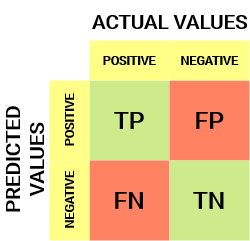

In [8]:
# Matriz de Confusión

def matriz_de_confusion(y_test, y_pred):
    # Importar módulo
    from sklearn import metrics

    # Crea la matriz
    cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

    # Visualización
    class_names=[0,1] # name  of classes
    fig, ax = plt.subplots(figsize=(6, 6))
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)

    # Heatmap
    sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="Blues", fmt='g', cbar=False, annot_kws={"size": 20})
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.ylabel('Realidad', fontsize=15, y=0.5)
    plt.xlabel('Estimado por el modelo', fontsize=15);

    # Métricas
    tn, fp, fn, tp = cnf_matrix.ravel()

    print("Precision:",metrics.precision_score(y_test, y_pred))
    print("Exactitud:",metrics.accuracy_score(y_test, y_pred))
    print("Sensibilidad:",metrics.recall_score(y_test, y_pred))
    print("Especificidad:", tn / (tn + fp))


**Curva ROC / AUC**

In [9]:
# El primer valor es la probabilidad de que el valor sea negativo.
# El segundo valor es la probabilidad de que el valor sea positivo.
# Necesitamos los resultados de esta manera para poder modificar el umbral y
# obtener los puntos necesarios para generar la curva ROC.

def roc_acu(modelo, X_test, y_test):
    y_pred_proba = modelo.predict_proba(X_test)

    y_pred_proba[:10,:]

    # Importar módulos de la ROC curve
    from sklearn.metrics import roc_curve, roc_auc_score

    fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])
    roc_auc = roc_auc_score(y_test, y_pred_proba[:, 1])

    # Visualización

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange',
            label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Proporción Positivos False')
    plt.ylabel('Proporción Positivos Verdaderos')
    plt.title('Curva ROC / AUC')
    plt.legend(loc="lower right")
    plt.show()


**Reportes de Clasificación**



El reporte de clasificación consiste en presentar métricas que evalúen el desempeño del modelo. Dichas métricas pueden ser:
- Precisión
- Sensibilidad
- Especificidad
- F1-Score
- AUC - ROC
- Error Cudrático Medio (MSE)
- Coeficiente de Determinación (R^2)

**Precisión :**  
Mide la proporción de predicciones correctas sobre el total de predicciones.  
Fórmula: Verdaderos Positivos / (Verdaderos Positivos + Falsos Positivos)


__Sensibilidad o Recuperación (Recall):__  
Mide la proporcion de verdaderos positivos respecto a todos los casos positivos reales. 
Fórmula:




__F1-Score:__  
Combina las métricas de precisión y recuperación o sensibilidad en una sola métrica. Es útil cuando existe un desequilibrio de clases. 


__AUC-ROC__  
Representa la capacidad del modelo para discriminar entre clases




## Algoritmo de Clasificación con Todo el Dataset 

Las métricas presentadas son claras y se interpretan adecuadamente. El algoritmo de clasificación elegido sobrepasa al resto de los algoritmos en eficacia.

**LazyPredict**

In [ ]:
!pip install lazypredict

In [30]:
#Importando bibliotecas
from lazypredict.Supervised import LazyClassifier

#Definir variables
X = df.drop('Class', axis=1)
y = df.Class

#Datos de entrenamiento y de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

#LazyClassifier
clf = LazyClassifier(predictions=True, verbose=0, ignore_warnings=True, custom_metric=None)

#Ajuste de modelo
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

#Resultado
print(models)

 97%|█████████▋| 28/29 [22:26<00:51, 51.69s/it]  

[LightGBM] [Info] Number of positive: 379, number of negative: 213226
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.032999 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 213605, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001774 -> initscore=-6.332572
[LightGBM] [Info] Start training from score -6.332572


100%|██████████| 29/29 [22:29<00:00, 46.54s/it]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
QuadraticDiscriminantAnalysis      0.98               0.93     0.93      0.99   
GaussianNB                         0.98               0.90     0.90      0.99   
RandomForestClassifier             1.00               0.90     0.90      1.00   
BaggingClassifier                  1.00               0.90     0.90      1.00   
ExtraTreesClassifier               1.00               0.89     0.89      1.00   
XGBClassifier                      1.00               0.89     0.89      1.00   
LinearSVC                          1.00               0.89     0.89      1.00   
NearestCentroid                    1.00               0.89     0.89      1.00   
LinearDiscriminantAnalysis         1.00               0.88     0.88      1.00   
DecisionTreeClassifier             1.00               0.88     0.88      1.00   
KNeighborsClassifier        

In [32]:
pd.DataFrame(models[:29])

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
QuadraticDiscriminantAnalysis,0.98,0.93,0.93,0.99,1.95
GaussianNB,0.98,0.90,0.90,0.99,0.70
RandomForestClassifier,1.00,0.90,0.90,1.00,542.34
BaggingClassifier,1.00,0.90,0.90,1.00,280.84
ExtraTreesClassifier,1.00,0.89,0.89,1.00,21.37
XGBClassifier,1.00,0.89,0.89,1.00,3.65
LinearSVC,1.00,0.89,0.89,1.00,69.97
NearestCentroid,1.00,0.89,0.89,1.00,0.65
LinearDiscriminantAnalysis,1.00,0.88,0.88,1.00,2.45


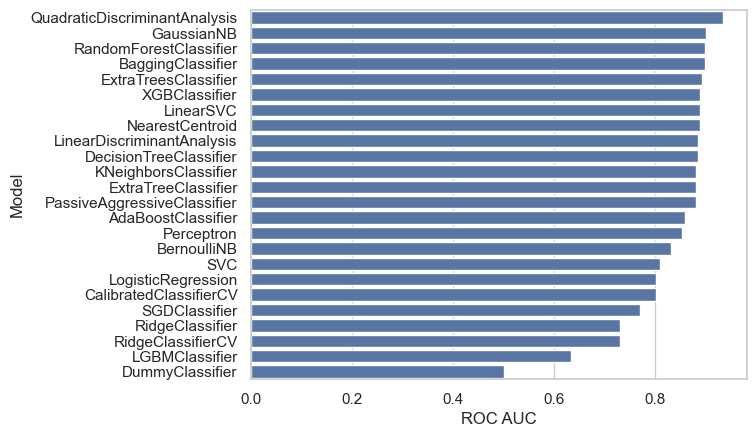

In [34]:
# Visualizar el resultado mejor

sns.set_theme(style='whitegrid')
ax=sns.barplot(y = models.index, x ='ROC AUC', data=models)

**Modelo Regresión Logística**  
- Modelo de Aprendizaje Supervisado
- Se usa para predecir la variable categórica dependiente (en este caso es 'Class') usando un conjunto de variables independientes.

In [58]:
# Regresión Logística

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, f1_score

model = LogisticRegression(max_iter=10000)

# Entrenamiento
model.fit(X_train, y_train)

# Predicción
y_pred = model.predict(X_test)


In [59]:
# K-fold y medidas de desempeño

# Reporte de Clasificación
print(classification_report(y_test, y_pred))

# F1 Score
print("F1 Score:", f1_score(y_test, y_pred))

import numpy as np
from sklearn.model_selection import KFold, cross_val_score

resultados = cross_val_score(model, X, y, cv=5 )

print(f'Media {resultados.mean()}')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71089
           1       0.85      0.60      0.70       113

    accuracy                           1.00     71202
   macro avg       0.92      0.80      0.85     71202
weighted avg       1.00      1.00      1.00     71202

F1 Score: 0.7046632124352332
Media 0.9991362569134072


In [63]:
# Validación Cruzada 
validacion_cruzada(model, X, y)

Precisión de validación cruzada: Promedio 1.00 (+/- 0.00)


Precision: 0.85
Exactitud: 0.9991994606893064
Sensibilidad: 0.6017699115044248
Especificidad: 0.9998311975129767


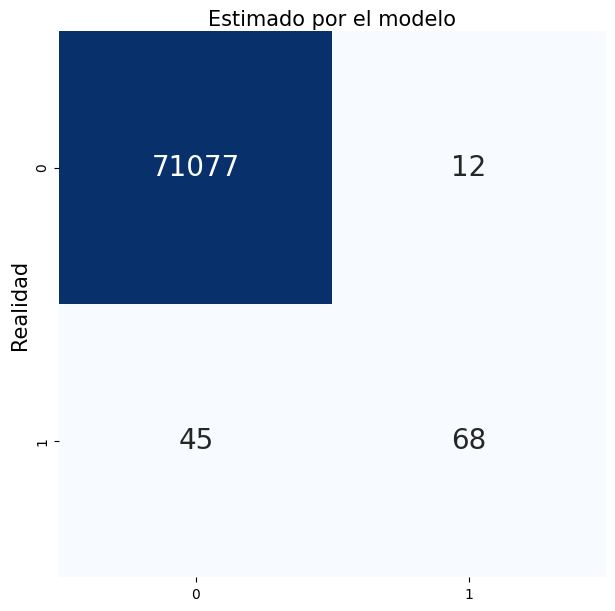

In [60]:
# Matriz de Confusión 
matriz_de_confusion(y_test, y_pred)

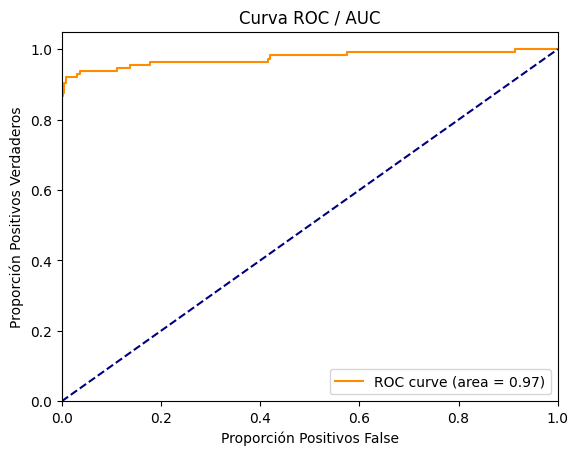

In [61]:
# ROC / AUC
roc_acu(model, X_test, y_test)

 Referencias:
 - [Regresión Logística](https://aws.amazon.com/es/what-is/logistic-regression/#:~:text=La%20regresi%C3%B3n%20log%C3%ADstica%20es%20una%20t%C3%A9cnica%20importante%20en%20el%20campo,de%20datos%20sin%20intervenci%C3%B3n%20humana.)

__Árbol de Decisión__
- Modelo de Aprendizaje Supervisado.
- Se puede usar para problemas de clasificación y regresión.
- Es un clasificador de tres estructuras, donde los nodos interiores representan las características del dataset, y las ramas representan las reglas de decisión donde cada hoja representa un outcome.


In [10]:
# Árbol de Decisión

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, f1_score

#Modelo de arbol de desición
modelo_arbol = DecisionTreeClassifier(random_state=42)

# Entrenamiento
modelo_arbol.fit(X_train, y_train)

# Predicciones
predicciones = modelo_arbol.predict(X_test)


In [12]:
# K-fold y medidas de desempeño

#Precision del modelo
precision = np.mean(predicciones == y_test)
print(f'Precisión del modelo en el conjunto de prueba: {precision:.2f}')

# Reporte de Clasificación
print(classification_report(y_test, predicciones))

# F1 Score
print("F1 Score:", f1_score(y_test, predicciones))

import numpy as np
from sklearn.model_selection import KFold, cross_val_score

resultados = cross_val_score(modelo_arbol, X, y, cv=5 )

print(f'Media {resultados.mean()}')

Precisión del modelo en el conjunto de prueba: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71089
           1       0.69      0.77      0.73       113

    accuracy                           1.00     71202
   macro avg       0.85      0.88      0.86     71202
weighted avg       1.00      1.00      1.00     71202

F1 Score: 0.7280334728033474
Media 0.7995294834719185


In [14]:
# Validación Cruzada 
validacion_cruzada(modelo_arbol, X, y)

Precision: 0.6904761904761905
Exactitud: 0.9990871042948232
Sensibilidad: 0.7699115044247787
Especificidad: 0.9994513919171742


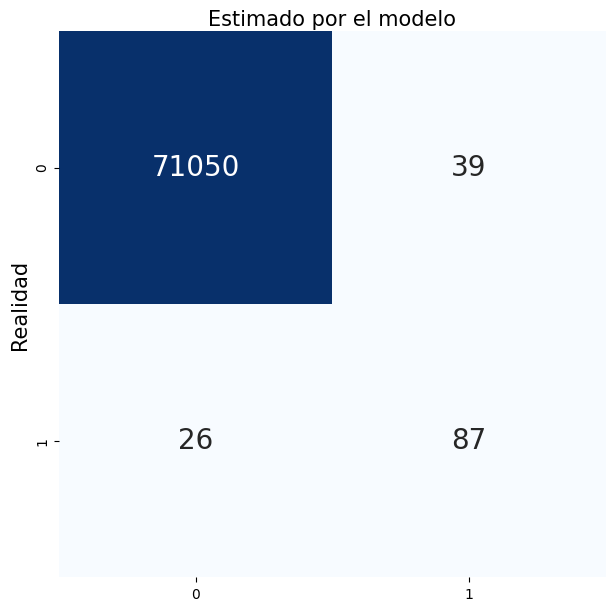

In [13]:
# Matriz de Confusión 
matriz_de_confusion(y_test, predicciones)

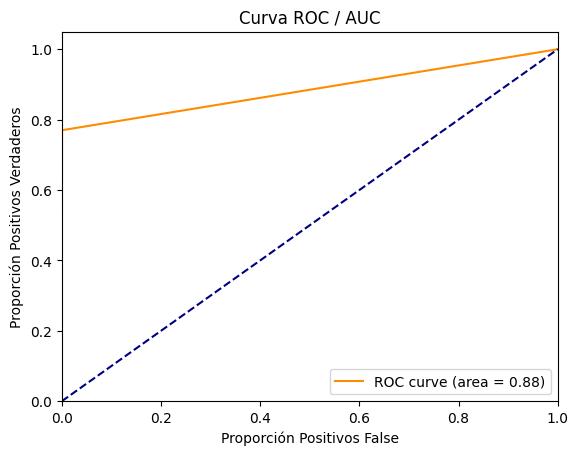

In [14]:
# ROC / AUC
roc_acu(modelo_arbol, X_test, y_test)

__Random Forest__


In [ ]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, f1_score

model = RandomForestClassifier()

# Entrenamiento
model.fit(X_train, y_train)

# Predicción
y_pred = model.predict(X_test)

# Reporte de Clasificación
print(classification_report(y_test, y_pred))

# F1 Score
print("F1 Score:", f1_score(y_test, y_pred))

In [ ]:
# K-fold y medidas de desempeño

# Reporte de Clasificación
print(classification_report(y_test, y_pred))

# F1 Score
print("F1 Score:", f1_score(y_test, y_pred))

# Validación Cruzada 
validacion_cruzada(model, X, y)

# Matriz de Confusión 
matriz_de_confusion(y_test, y_pred)

# ROC / AUC
roc_acu(model, X_test, y_test)

# Referencias

- https://www.elastic.co/es/what-is/machine-learning

- https://www.geeksforgeeks.org/getting-started-machine-learning/?ref=lbp

- https://www.youtube.com/watch?v=M_Cu7r9gik4&list=TLPQMDExMjIwMjMvG_hqJzTdLg&index=2

- https://www.youtube.com/watch?v=NCgjcHLFNDg&t=540s

- https://www.youtube.com/watch?v=sq5BYW4COwA

- https://www.youtube.com/watch?v=v14ydtOuOr4

- https://www.youtube.com/watch?v=v14ydtOuOr4

- https://www.youtube.com/watch?v=M_Cu7r9gik4&list=TLPQMDExMjIwMjMvG_hqJzTdLg&index=2

- https://www.youtube.com/watch?v=pohp5AZrp3I&list=PLrR_uxt9l8PvDQan0_QMB5oS3OwWoCiYk

- https://www.analyticslane.com/2021/03/01/uso-de-las-f-string-de-python-para-mejorar-el-formato-de-textos/

- https://www.kaggle.com/code/angelicarico/analysis-credit-card-fraud